In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import numpy as np
import bokeh 
from bokeh.plotting import figure, output_file, show
from bokeh.charts import Bar, output_notebook, show

In [18]:
output_notebook()
arq = open("comp_prices.csv", "r")
df = pd.read_csv(arq)

Loading BokehJS ...

In [19]:
df.shape

(50114, 5)

In [20]:
df.head(5)

,PROD_ID,DATE_EXTRACTION,COMPETITOR,COMPETITOR_PRICE,PAY_TYPE
0,P6,1/30/2015 8:11:38,C3,18980,1
1,P6,1/30/2015 8:11:38,C1,18980,1
2,P6,1/30/2015 8:11:38,C6,19999,1
3,P6,1/31/2015 20:10:14,C2,189488,2
4,P6,1/31/2015 20:10:14,C3,189488,2


In [24]:
df.tail(5)

,PROD_ID,DATE_EXTRACTION,COMPETITOR,COMPETITOR_PRICE,PAY_TYPE
50109,P5,2015-10-11 20:10:34,C1,819.00,2
50110,P5,2015-10-11 20:10:34,C2,853.52,2
50111,P5,2015-10-12 08:11:27,C2,853.52,1
50112,P5,2015-10-12 08:11:27,C3,819.00,1
50113,P5,2015-10-12 08:11:27,C1,819.00,1


In [21]:
df.apply(lambda x: sum(x.isnull()),axis=0)

PROD_ID             0
DATE_EXTRACTION     0
COMPETITOR          0
COMPETITOR_PRICE    0
PAY_TYPE            0
dtype: int64

In [22]:
d=df['COMPETITOR']
e=df['COMPETITOR_PRICE']

In [25]:
competidor_map = {'C1':1, 'C2':2, 'C3':3, 'C4':4, 'C5':5, 'C6':6}

In [26]:
produto_map={'P1':1, 'P2':2, 'P3':3, 'P4':4, 'P5':5, 'P6':6, 'P7':7, 'P8':8,'P9':9}

In [27]:
df['COMPETITOR'] = df['COMPETITOR'].map(competidor_map)

In [28]:
df['PROD_ID'] = df['PROD_ID'].map(produto_map)

In [29]:
df.head(5)

,PROD_ID,DATE_EXTRACTION,COMPETITOR,COMPETITOR_PRICE,PAY_TYPE
0,6,1/30/2015 8:11:38,3,18980,1
1,6,1/30/2015 8:11:38,1,18980,1
2,6,1/30/2015 8:11:38,6,19999,1
3,6,1/31/2015 20:10:14,2,189488,2
4,6,1/31/2015 20:10:14,3,189488,2


In [31]:
num_C1 = len(df.loc[df['COMPETITOR'] == 1])
num_C2 = len(df.loc[df['COMPETITOR'] == 2])
num_C3 = len(df.loc[df['COMPETITOR'] == 3])
num_C4 = len(df.loc[df['COMPETITOR'] == 4])
num_C5 = len(df.loc[df['COMPETITOR'] == 5])
num_C6 = len(df.loc[df['COMPETITOR'] == 6])
print("Quantidade de Competidor1: {0} ({1:2.2f}%)".format(num_C1,(num_C1/(num_C1+num_C2+num_C3+num_C4+num_C5+num_C6))*100))
print("Quantidade de Competidor2: {0} ({1:2.2f}%)".format(num_C2,(num_C2/(num_C1+num_C2+num_C3+num_C4+num_C5+num_C6))*100))
print("Quantidade de Competidor3: {0} ({1:2.2f}%)".format(num_C3,(num_C3/(num_C1+num_C2+num_C3+num_C4+num_C5+num_C6))*100))
print("Quantidade de Competidor4: {0} ({1:2.2f}%)".format(num_C4,(num_C4/(num_C1+num_C2+num_C3+num_C4+num_C5+num_C6))*100))
print("Quantidade de Competidor5: {0} ({1:2.2f}%)".format(num_C5,(num_C5/(num_C1+num_C2+num_C3+num_C4+num_C5+num_C6))*100))
print("Quantidade de Competidor6: {0} ({1:2.2f}%)".format(num_C6,(num_C6/(num_C1+num_C2+num_C3+num_C4+num_C5+num_C6))*100))

Quantidade de Competidor1: 9868 (19.69%)
Quantidade de Competidor2: 9770 (19.50%)
Quantidade de Competidor3: 9695 (19.35%)
Quantidade de Competidor4: 7989 (15.94%)
Quantidade de Competidor5: 4287 (8.55%)
Quantidade de Competidor6: 8505 (16.97%)


In [34]:
x=df['COMPETITOR'] 
y=df['PROD_ID'] 

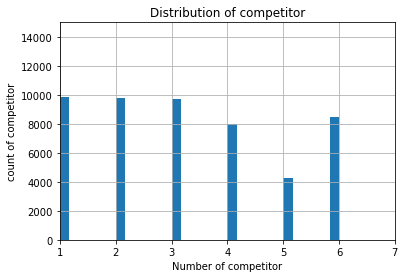

In [35]:
x.hist(bins=30)
plt.axis((1,7,0,15000))
plt.title("Distribution of competitor")
plt.ylabel('count of competitor')
plt.xlabel('Number of competitor');

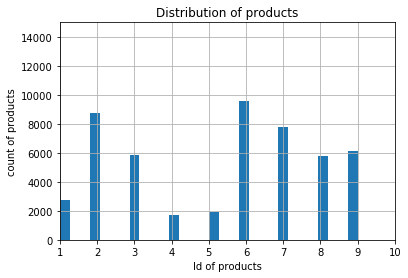

In [36]:
y.hist(bins=30)
plt.axis((1,10,0,15000))
plt.title("Distribution of products")
plt.ylabel('count of products')
plt.xlabel('Id of products');

In [38]:
prod_c1=df[y==1]
print(prod_c1)

       PROD_ID      DATE_EXTRACTION  COMPETITOR  COMPETITOR_PRICE  PAY_TYPE
17290        1  2015-03-16 20:10:14           5           1424.05         2
17291        1  2015-03-16 20:10:14           2           1362.50         2
17292        1  2015-03-16 20:10:14           6           1499.00         2
17310        1  2015-03-16 08:11:32           5           1499.00         2
17311        1  2015-03-16 08:11:32           6           1499.00         2
17312        1  2015-06-18 20:10:22           1           1349.10         2
17313        1  2015-06-18 20:10:22           2           1259.10         2
17314        1  2015-06-18 20:10:22           3           1259.10         2
17315        1  2015-06-18 20:10:22           5           1424.05         2
17316        1  2015-03-20 08:12:50           1           1499.00         1
17317        1  2015-03-20 08:12:50           6           1359.00         1
17318        1  2015-03-20 08:12:50           2           1499.00         1
17319       

In [40]:
df3=prod_c1['COMPETITOR']

In [41]:
print(df3)

17290    5
17291    2
17292    6
17310    5
17311    6
17312    1
17313    2
17314    3
17315    5
17316    1
17317    6
17318    2
17319    2
17320    5
17321    1
17322    3
17323    5
17324    5
17325    2
17326    5
17410    2
17411    5
17412    6
17413    1
17414    5
17415    2
17416    2
17417    1
17418    5
17419    6
        ..
26527    5
26528    2
26529    5
26530    3
26531    2
26545    1
26546    5
26547    3
26548    2
26549    3
26550    1
26551    5
26552    2
26553    1
26554    1
26555    3
26556    2
26557    5
26558    1
26559    5
26560    3
26561    2
26562    1
26563    2
26564    3
26565    5
26629    5
26630    3
26631    1
26632    2
Name: COMPETITOR, dtype: int64


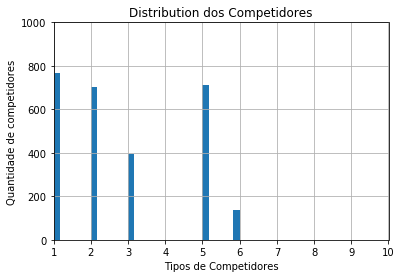

In [48]:
df3.hist(bins=30)
plt.axis((1,10,0,1000))
plt.title("Distribution dos Competidores")
plt.ylabel('Quantidade de competidores')
plt.xlabel('Tipos de Competidores');

In [59]:
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
    

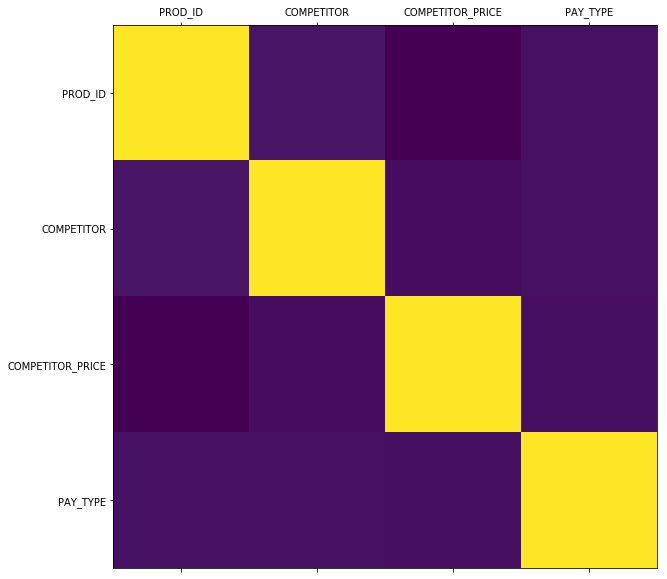

In [60]:
plot_corr(df)

In [61]:
df.corr()

,PROD_ID,COMPETITOR,COMPETITOR_PRICE,PAY_TYPE
PROD_ID,1.000000,0.005499,-0.048431,-0.000009
COMPETITOR,0.005499,1.000000,-0.012172,-0.000006
COMPETITOR_PRICE,-0.048431,-0.012172,1.000000,-0.003733
PAY_TYPE,-0.000009,-0.000006,-0.003733,1.000000


In [71]:
#medidas de tendências centrais
#moda
#produto P1 é mais comprado 
#x=df['COMPETITOR'] 
#y=df['PROD_ID']
m=x
moda=lambda m: (m.mode())
    

In [72]:
print(moda(m))
#competidor 1 é o que mais compra (vende)

0    1
dtype: int64


In [74]:
n=y
moda=lambda n: (n.mode())

#produto 6 é o mais vendido

In [75]:
print(moda(n))


0    6
dtype: int64


In [77]:
z=df['COMPETITOR_PRICE']

In [78]:
print(z)

0         1898.00
1         1898.00
2         1999.90
3         1894.88
4         1894.88
5         1894.88
6         1999.90
7         1896.62
8         2199.00
9         1895.98
10        2099.00
11        1898.00
12        1599.00
13        1439.10
14        1858.00
15        2379.87
16        1439.10
17        1885.90
18        1859.00
19        1999.00
20        1869.15
21        2155.02
22        1885.90
23        1859.00
24        1994.00
25        1998.00
26        2199.00
27        1994.00
28        1994.00
29        1999.00
           ...   
50084      819.00
50085      853.52
50086      849.00
50087      853.52
50088      849.00
50089      849.00
50090      853.52
50091      849.00
50092      849.00
50093      853.52
50094      848.89
50095      848.89
50096      853.52
50097      819.00
50098      848.89
50099      848.89
50100      853.52
50101      819.00
50102    84890.00
50103    81900.00
50104    81900.00
50105    84890.00
50106    81900.00
50107    81900.00
50108     

In [92]:
#media de preços
p=df['COMPETITOR_PRICE']
media_price= lambda p: (p.mean())

In [93]:
print(media_price(p))

1111.2814486969246


In [94]:
print(p.median())

799.0


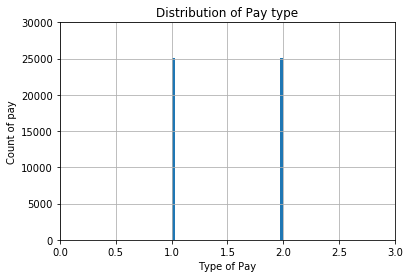

In [13]:
df4=df['PAY_TYPE']
df4.hist(bins=30)
plt.axis((0,3,0,30000))
plt.title("Distribution of Pay type")
plt.ylabel('Count of pay')
plt.xlabel('Type of Pay');

In [83]:
m=df['PAY_TYPE']
moda= lambda m: (m.mode())

In [84]:
print(moda(m))
#tipo 1 de pagamento é o mais realizado

0    1
dtype: int64


In [86]:
#amplitude competitor_price
print(df['COMPETITOR_PRICE'].max()-df['COMPETITOR_PRICE'].min())
#valores da série distribuídos de forma afastada, amplitude alta

149540.9


In [102]:
# média tende ao terceiro quartil, isso ocorre devido aos outliers existentes na amostra.
#esse dado fica mais nítido ao olharmos o desvio padrão mostrando que há uma irregularidade na série 
#o proximo passo é realizar o desvio padrão para verificar a tendência da curva de variancia

print(df['COMPETITOR_PRICE'].std())

3805.6134997751665


In [103]:
# amedida de dispersão acima mostra o quanto os dados estão afastados da média, sendo assim realizei a
#desvio absoluto que retornará uma medida menos influenciada por amostras extremas.


print(df['COMPETITOR_PRICE'].mad())


600.9411609329968


In [106]:
print(df['COMPETITOR_PRICE'].describe())

count     50114.000000
mean       1111.281449
std        3805.613500
min         359.100000
25%         549.000000
50%         799.000000
75%        1359.000000
max      149900.000000
Name: COMPETITOR_PRICE, dtype: float64


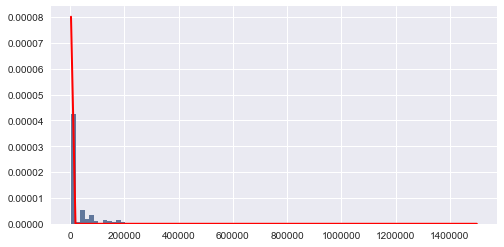

In [37]:
#distribuíção normal
import seaborn as sns # importando seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

mu, sigma = 799, 3805.6134997751665 
s = df['COMPETITOR_PRICE']

conta, box, ignorar = plt.hist(s, 90, normed=True)
normal = plt.plot(box, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (box - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

Axes(0.125,0.125;0.775x0.755)


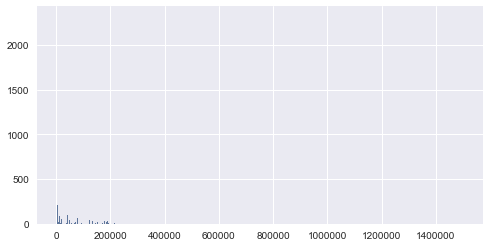

In [33]:
print(df['COMPETITOR_PRICE'].hist(bins=10000))

In [122]:
#há poucos valores extremos sendo assim a melhor medida para representar a amostra é a mediana

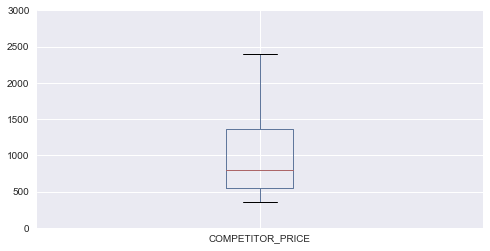

In [127]:
plt.axis((0,10,0,3000))
df.boxplot(column='COMPETITOR_PRICE')

In [128]:
df.apply(lambda x: sum(x.isnull()),axis=0)

PROD_ID             0
DATE_EXTRACTION     0
COMPETITOR          0
COMPETITOR_PRICE    0
PAY_TYPE            0
dtype: int64

In [38]:
#tratando os valores extremos da amostra
df['COMPETITOR_PRICE_LOG'] = np.log(df['COMPETITOR_PRICE']) 

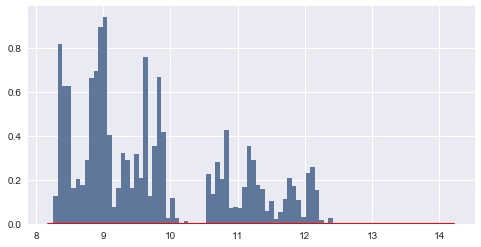

In [40]:
#distribuíção normal
import seaborn as sns # importando seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

mu, sigma = 0, 0.1 
s = df['COMPETITOR_PRICE_LOG']

conta, box, ignorar = plt.hist(s, 90, normed=True)
normal = plt.plot(box, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (box - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

In [136]:
print(df['COMPETITOR_PRICE_LOG'].describe())

count    50114.000000
mean         6.764516
std          0.531489
min          5.883601
25%          6.308098
50%          6.683361
75%          7.214504
max         11.917724
Name: COMPETITOR_PRICE_LOG, dtype: float64


In [46]:
#regressão linear
x = df['COMPETITOR']
y = df['COMPETITOR_PRICE']
from scipy.stats import linregress

linregress(x,y)


LinregressResult(slope=-3040.4256248192569, intercept=44694.179435722646, rvalue=-0.088306620160246499, pvalue=2.6078797710859254e-87, stderr=153.20406520843724)

In [47]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print (slope)
print (intercept)
print (r_value)
print (p_value)
print (std_err)

-3040.42562482
44694.1794357
-0.0883066201602
2.60787977109e-87
153.204065208


In [47]:
df5=df['COMPETITOR_PRICE']

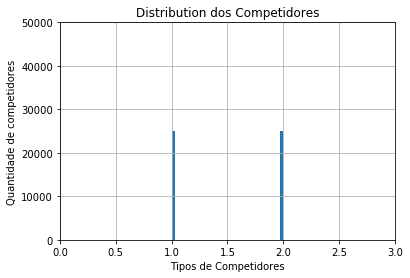

In [54]:
df4.hist(bins=30)
plt.axis((0,3,0,50000))
plt.title("Distribution dos Competidores")
plt.ylabel('Quantidade de competidores')
plt.xlabel('Tipos de Competidores');

In [59]:
s=df4
def conta_ocorrencias(s):
    ocorrencias = {}
    for c in s:
        if c in ocorrencias:
            ocorrencias[c] = ocorrencias[c] + 1
        else:
            ocorrencias[c] = 1
    return ocorrencias

In [61]:
print(conta_ocorrencias(s))

{1: 25072, 2: 25042}


In [64]:
df6=df['PROD_ID']


In [65]:
s=df6
def conta_ocorrencias(s):
    ocorrencias = {}
    for c in s:
        if c in ocorrencias:
            ocorrencias[c] = ocorrencias[c] + 1
        else:
            ocorrencias[c] = 1
    return ocorrencias

In [66]:
print(conta_ocorrencias(s))

{6: 9542, 7: 7748, 1: 2713, 2: 8755, 8: 5795, 9: 6123, 3: 5853, 4: 1689, 5: 1896}


In [67]:
df7= df['DATE_EXTRACTION']

In [68]:
s=df7
def conta_ocorrencias(s):
    ocorrencias = {}
    for c in s:
        if c in ocorrencias:
            ocorrencias[c] = ocorrencias[c] + 1
        else:
            ocorrencias[c] = 1
    return ocorrencias

In [69]:
print(conta_ocorrencias(s))

{'2015-01-30 08:11:38': 22, '2015-01-31 20:10:14': 24, '2015-01-31 20:10:05': 10, '2015-03-16 20:10:05': 30, '2015-02-17 08:10:23': 40, '2015-02-17 08:11:34': 56, '2015-02-12 20:10:24': 30, '2015-02-12 08:10:24': 18, '2015-02-12 20:10:05': 20, '2015-03-05 20:10:19': 16, '2015-03-06 08:10:22': 18, '2015-02-18 08:10:23': 20, '2015-02-18 08:11:55': 28, '2015-02-18 20:10:15': 28, '2015-02-19 08:11:24': 28, '2015-02-19 20:10:15': 28, '2015-03-09 20:10:04': 20, '2015-03-09 20:10:13': 28, '2015-01-09 08:10:25': 12, '2015-01-09 20:10:14': 30, '2015-01-08 20:10:05': 24, '2015-03-13 20:10:05': 20, '2015-02-07 20:11:27': 26, '2015-01-15 20:10:14': 26, '2015-01-18 08:11:42': 26, '2015-01-14 08:39:50': 30, '2015-01-20 20:10:05': 12, '2015-01-22 20:10:13': 26, '2015-01-20 20:10:13': 32, '2015-01-13 20:10:15': 24, '2015-01-16 20:10:13': 26, '2015-01-21 08:10:23': 12, '2015-01-28 08:10:21': 12, '2015-03-24 20:10:17': 48, '2015-03-13 20:10:14': 28, '2015-03-16 20:10:14': 48, '2015-02-03 08:10:22': 10, 

In [70]:
m=s
moda=lambda m: (m.mode())

In [74]:
print(moda(m))

0    2015-07-09 20:52:29
dtype: object


In [51]:
dados_compP = df['COMPETITOR_PRICE']


In [54]:
moavg = pd.rolling_mean(dados_compP, 40)
print(moavg)

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
5               NaN
6               NaN
7               NaN
8               NaN
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              NaN
23              NaN
24              NaN
25              NaN
26              NaN
27              NaN
28              NaN
29              NaN
            ...    
50084     37310.325
50085     39238.300
50086     37611.075
50087     39539.050
50088     37911.825
50089     36284.600
50090     38212.575
50091     38219.000
50092     36601.375
50093     38529.350
50094     38517.775
50095     40434.175
50096     42362.150
50097     40727.425
50098     42643.825
50099     44560.225
50100     44560.225
50101     44559.150
50102     65575.825


C:\Users\Paulinha\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=40,center=False).mean()
  if __name__ == '__main__':


In [55]:
df.apply(lambda x: sum(moavg.isnull()),axis=0)

PROD_ID                 39
DATE_EXTRACTION         39
COMPETITOR              39
COMPETITOR_PRICE        39
PAY_TYPE                39
COMPETITOR_PRICE_LOG    39
dtype: int64

In [56]:
rets = dados_compP / dados_compP.shift(1) - 1
rets.head()

0         NaN
1    0.000000
2    0.053688
3    8.474874
4    0.000000
Name: COMPETITOR_PRICE, dtype: float64

In [57]:
dados_compP.pct_change().head()
        
        
        
   

0         NaN
1    0.000000
2    0.053688
3    8.474874
4    0.000000
Name: COMPETITOR_PRICE, dtype: float64

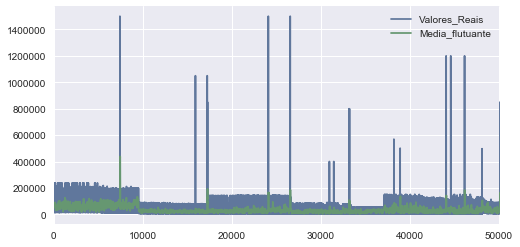

In [59]:
dados_compP.plot(label='Valores_Reais')
moavg.plot(label='Media_flutuante')
plt.legend()

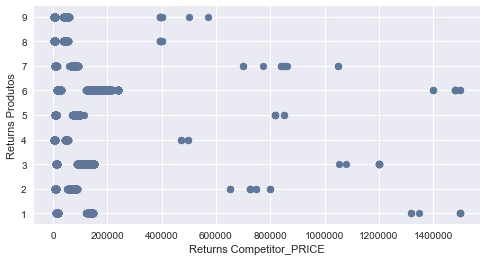

In [69]:
x=df['COMPETITOR_PRICE']
y=df['PROD_ID']
plt.scatter(x,y )
plt.xlabel('Returns Competitor_PRICE')
plt.ylabel('Returns Produtos')

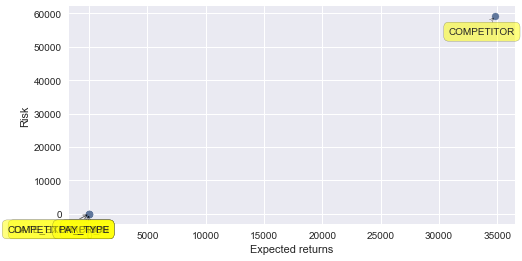

In [70]:
plt.scatter(df.mean(), df.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(df.columns, df.mean(), df.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

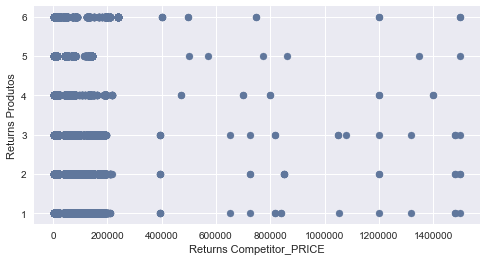

In [71]:
x=df['COMPETITOR_PRICE']
y=df['COMPETITOR']
plt.scatter(x,y )
plt.xlabel('Returns Competitor_PRICE')
plt.ylabel('Returns cOMPETITOR')